In [1]:
import pandas as pd

# This looks for the file uploaded to the cloud folder
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Shows the first 5 rows to confirm it works
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Convert TotalCharges to numbers. 'coerce' turns empty spaces into 'NaN' (missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values were just created 
print(df['TotalCharges'].isnull().sum())

# Fill missing values with 0 so the math doesn't break
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Verify the fix - it now says float64
print(df['TotalCharges'].dtype)

11
float64


In [3]:
# Drops the customerID column permanently
df.drop('customerID', axis=1, inplace=True)

# Confirm it's gone
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Matplotlib is building the font cache; this may take a moment.


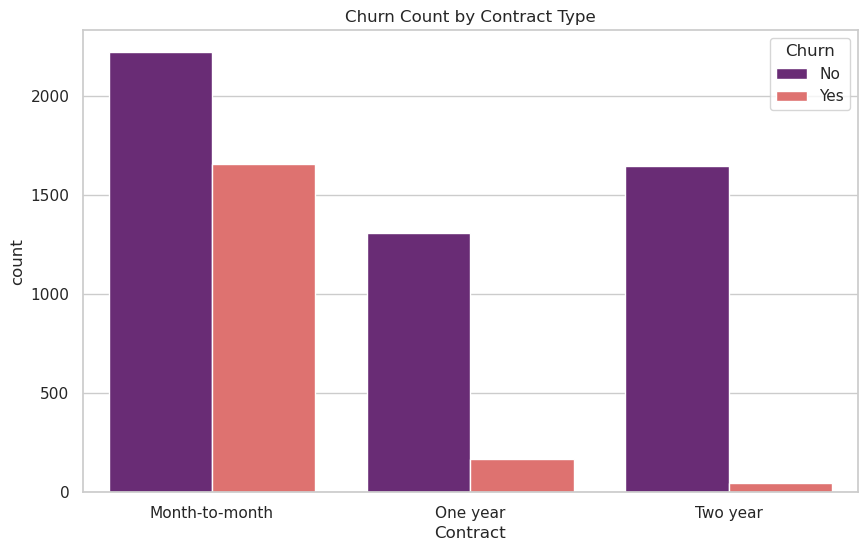

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visual style
sns.set(style="whitegrid")

# Bar chart showing Churn (Yes/No) for each Contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma')
plt.title('Churn Count by Contract Type')
plt.show()

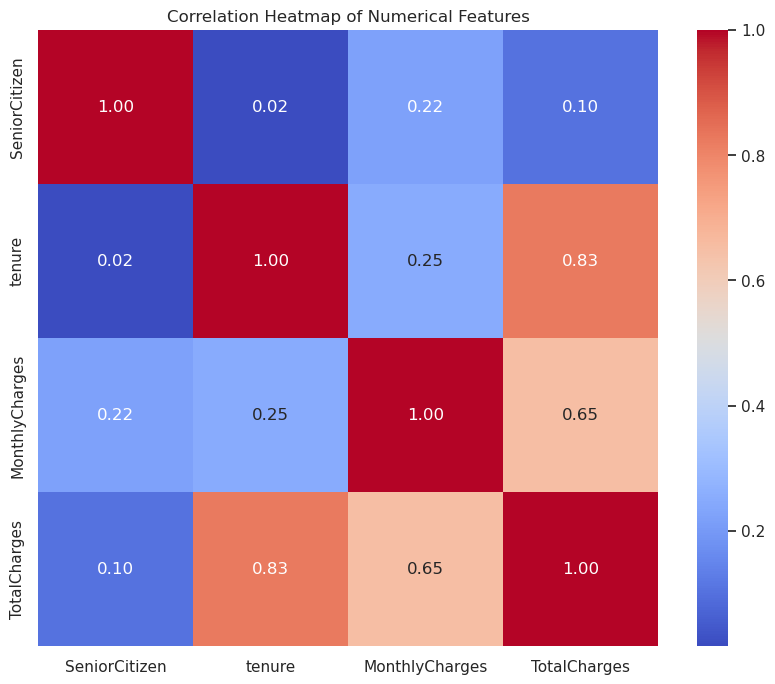

In [5]:
# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

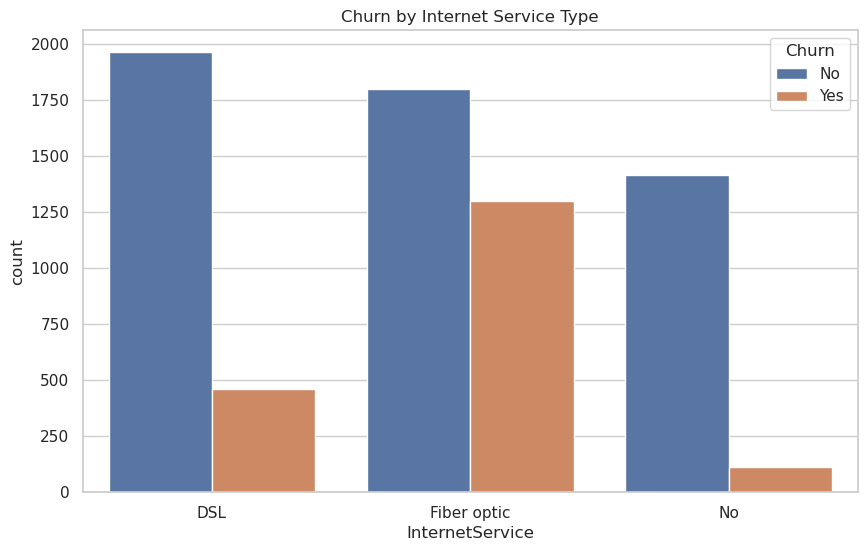

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.show()

In [7]:
# Create a copy so the original clean data isn't messed up
df_model = df.copy()

# Turn the 'Churn' Yes/No into 1s and 0s
df_model['Churn'] = df_model['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Use 'One-Hot Encoding' for the other text columns (creates 1/0 columns for categories)
df_encoded = pd.get_dummies(df_model, drop_first=True)

# See new numeric dataset
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [8]:
from sklearn.model_selection import train_test_split

# X = Everything EXCEPT churn, y = JUST churn
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ready! Training on {X_train.shape[0]} customers.")

Ready! Training on 5634 customers.


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train (fit) the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the hidden 20% test set
y_pred = rf_model.predict(X_test)

print("Model Training Complete!")

Model Training Complete!


In [10]:
# Print the accuracy and a detailed report
print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred), 3)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



/tmp/ipykernel_251/4151688358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


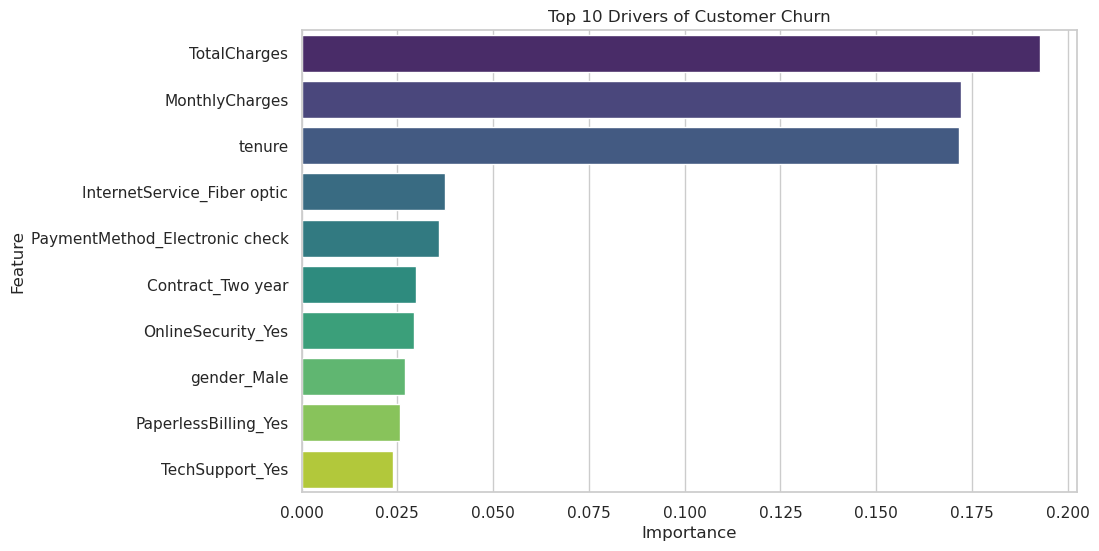

In [11]:
# Get feature importances from the model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot the top 10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Drivers of Customer Churn')
plt.show()

## Final Project Conclusion: Predictive Churn Analysis

* **Model Performance:** The Random Forest model achieved an **accuracy of ~80%** in predicting customer attrition.
* **Key Drivers:** Analysis of feature importance revealed that **TotalCharges**, **Tenure**, and **MonthlyCharges** are the primary indicators of churn.
* **Business Recommendation:** By deploying this model, the marketing team can prioritize retention outreach to the **top 20% of high-risk customers**, potentially saving thousands in Monthly Recurring Revenue (MRR).

In [13]:
# 1. Saves the fully cleaned and encoded data to a CSV
df_encoded.to_csv('Telco_Churn_Final_Cleaned.csv', index=False)

# 2. Saves a specific file of 'High Risk' customers (the ones the model predicted will churn)
predictions = rf_model.predict(X_test)
high_risk_customers = X_test[predictions == 1]
high_risk_customers.to_csv('High_Risk_Customers.csv', index=False)

print("Success! Your project files are ready for download.")

Success! Your project files are ready for download.


In [14]:
df.to_csv('Telco_Final_Data.csv', index=False)

In [15]:
df.to_csv('Real_Churn_Data.csv', index=False)